# Phase 2: Feature Analysis

This notebook visualizes the engineered features to ensure they behave as expected before feeding them into the HMM.

**Goals:**
1. Check feature distributions (stationarity, outliers).
2. Analyze correlation structure (redundancy).
3. Verify logic of complex features (MACD, Volatility, Skew).

In [11]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.data.loader import load_ohlcv_csv
#from src.data.cleaner import clean_ohlcv
from src.features.builder import build_features

%matplotlib inline
sns.set_theme(style="whitegrid")

## 1. Load Data

In [12]:
data_path = project_root / "data/raw/btc_4h.csv"

try:
    df = load_ohlcv_csv(data_path)
    # Optional: clean if cleaner logic allows fixing, otherwise assume clean
    # df = clean_ohlcv(df) 
    print(f"Loaded {len(df)} candles from {df.index.min()} to {df.index.max()}")
except FileNotFoundError:
    print("Data file not found. Generating synthetic data for demonstration.")
    dates = pd.date_range(start='2020-01-01', periods=5000, freq='4h')
    df = pd.DataFrame({
        'open': 10000 + np.cumsum(np.random.normal(0, 50, 5000)),
        'close': 10000 + np.cumsum(np.random.normal(0, 50, 5000)),
        'high': 0,
        'low': 0,
        'volume': np.abs(np.random.normal(100, 20, 5000))
    }, index=dates)
    df['high'] = df[['open', 'close']].max(axis=1) + 10
    df['low'] = df[['open', 'close']].min(axis=1) - 10

Loaded 1012 candles from 2025-07-02 20:00:00+00:00 to 2025-12-18 08:00:00+00:00


## 2. Build Features

In [13]:
features = build_features(df)
print(f"Generated {features.shape[1]} features.")
features.dropna(inplace=True)
print(f"Data points after dropping NaNs: {len(features)}")
features.head()

Generated 39 features.
Data points after dropping NaNs: 884


,log_return,rolling_mean_short,rolling_mean_medium,rolling_mean_long,rolling_std_short,rolling_std_medium,rolling_std_long,autocorr_lag1_short,vol_realized_short,vol_realized_medium,...,trend_macd_line,trend_macd_signal,trend_macd_hist,trend_rsi_14,dist_skew_short,dist_skew_medium,dist_skew_long,dist_kurt_short,dist_kurt_medium,dist_kurt_long
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-07-24 04:00:00+00:00,-0.000614,-0.001613,0.000130,-3.374665e-05,0.004308,0.005584,0.006785,0.154447,0.004308,0.005584,...,101.916286,119.028188,-17.111902,49.931785,-0.461361,-0.483425,0.366907,-0.303646,1.437756,3.101128
2025-07-24 08:00:00+00:00,0.001551,-0.000015,0.000073,-4.749835e-05,0.001960,0.005559,0.006781,-0.615549,0.001960,0.005559,...,99.565106,115.135572,-15.570465,51.385825,-0.520904,-0.478618,0.354972,-0.258321,1.444669,3.109696
2025-07-24 12:00:00+00:00,0.004145,0.000782,0.000245,7.885341e-07,0.002211,0.005599,0.006800,-0.220162,0.002211,0.005599,...,135.888084,119.286074,16.602010,55.146069,-0.528075,-0.492847,0.360183,-0.168420,1.410774,3.147642
2025-07-24 16:00:00+00:00,-0.001254,0.000426,0.000162,-2.355682e-04,0.002290,0.005601,0.006569,-0.347333,0.002290,0.005601,...,150.893288,125.607517,25.285771,53.788857,-0.595229,-0.589612,0.375176,0.009716,1.640081,3.158702
2025-07-24 20:00:00+00:00,-0.005078,-0.000239,0.000075,-5.697786e-04,0.003010,0.005662,0.006250,-0.065859,0.003010,0.005662,...,112.872826,123.060579,-10.187753,48.589921,-0.617362,-0.830481,0.375187,0.207248,1.634907,3.143106


## 3. Correlation Analysis
Identify highly correlated features that might cause issues for the HMM.

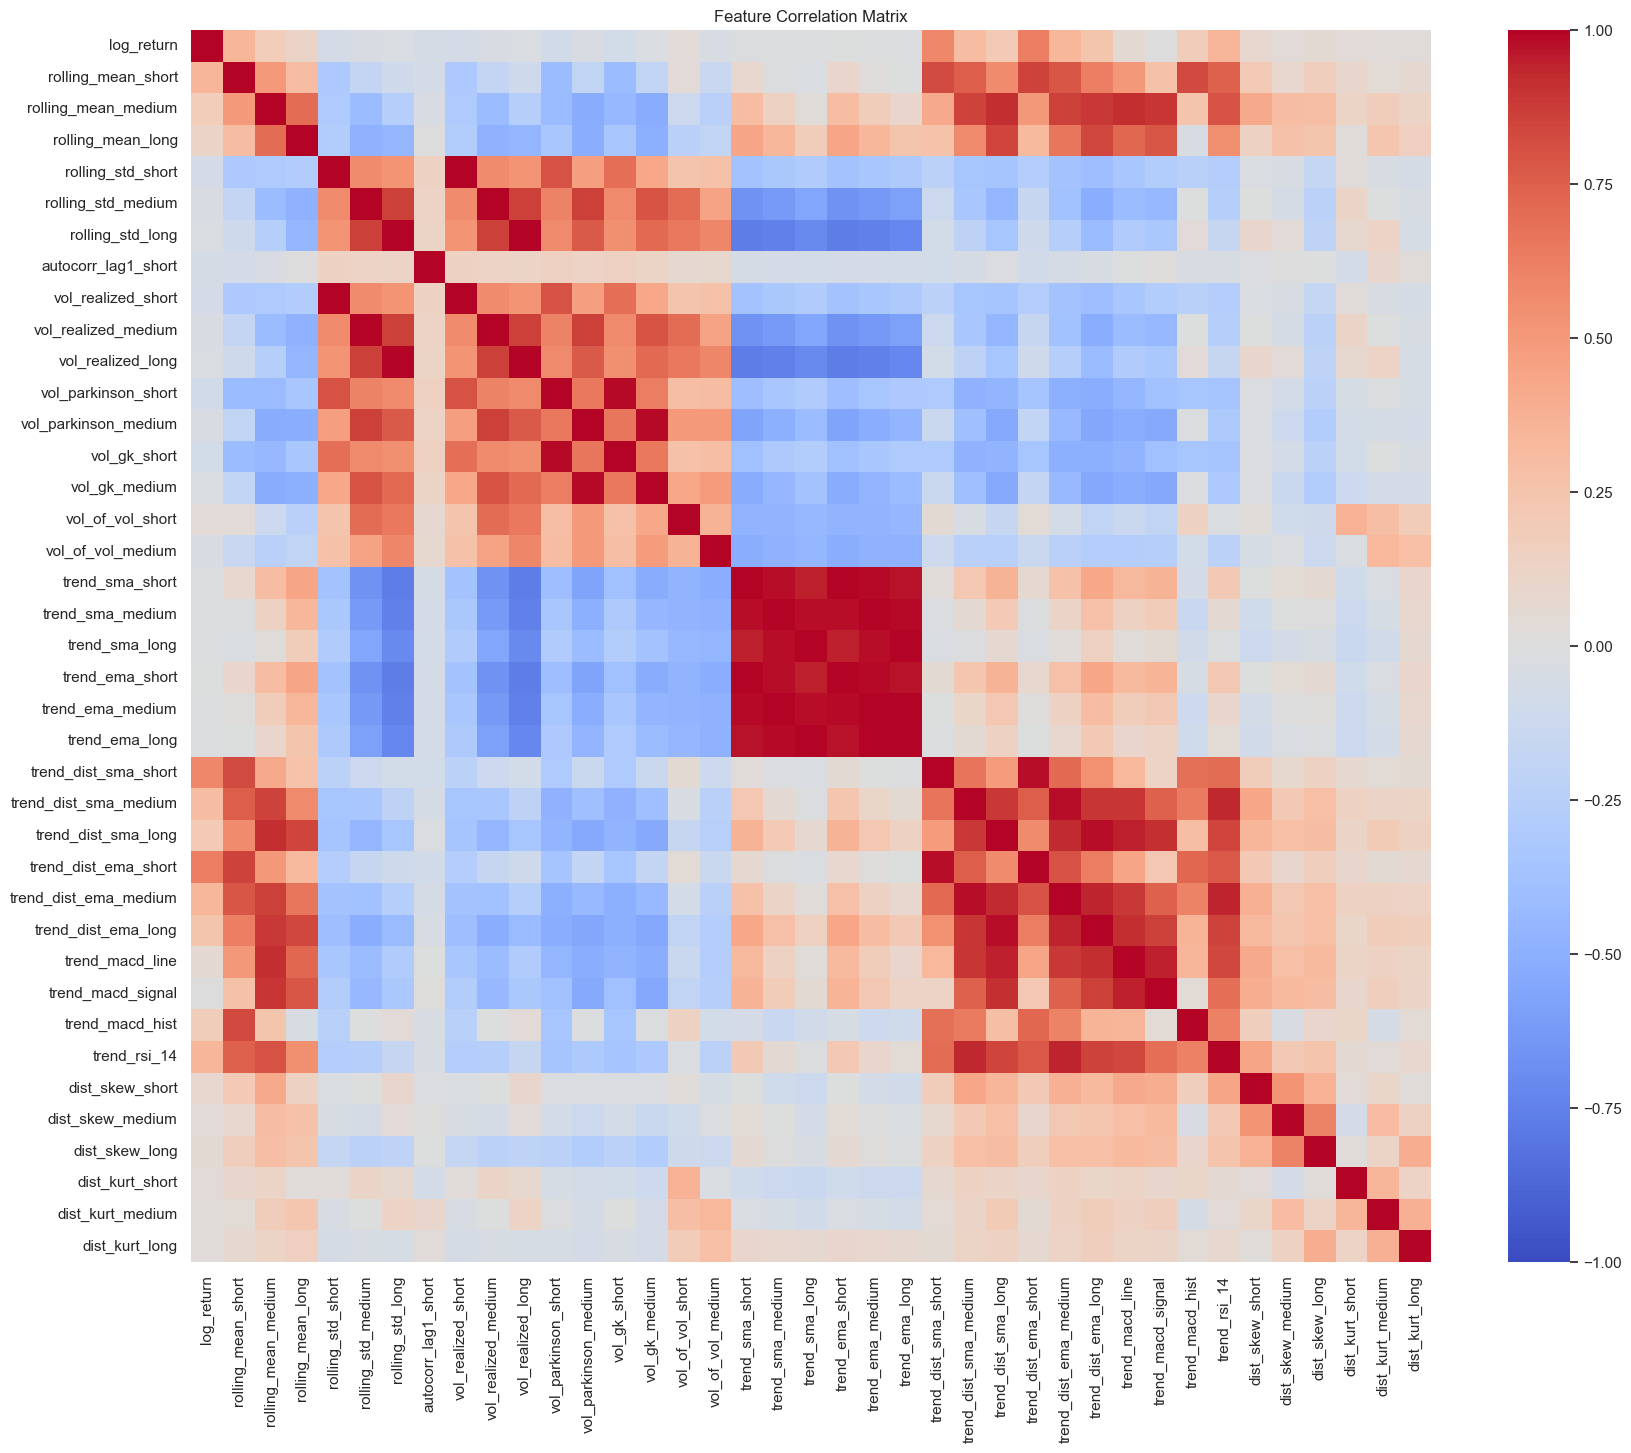

In [14]:
plt.figure(figsize=(20, 16))
corr = features.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

## 4. Distribution Analysis
Check for fat tails and skewness, which are critical for regime detection.

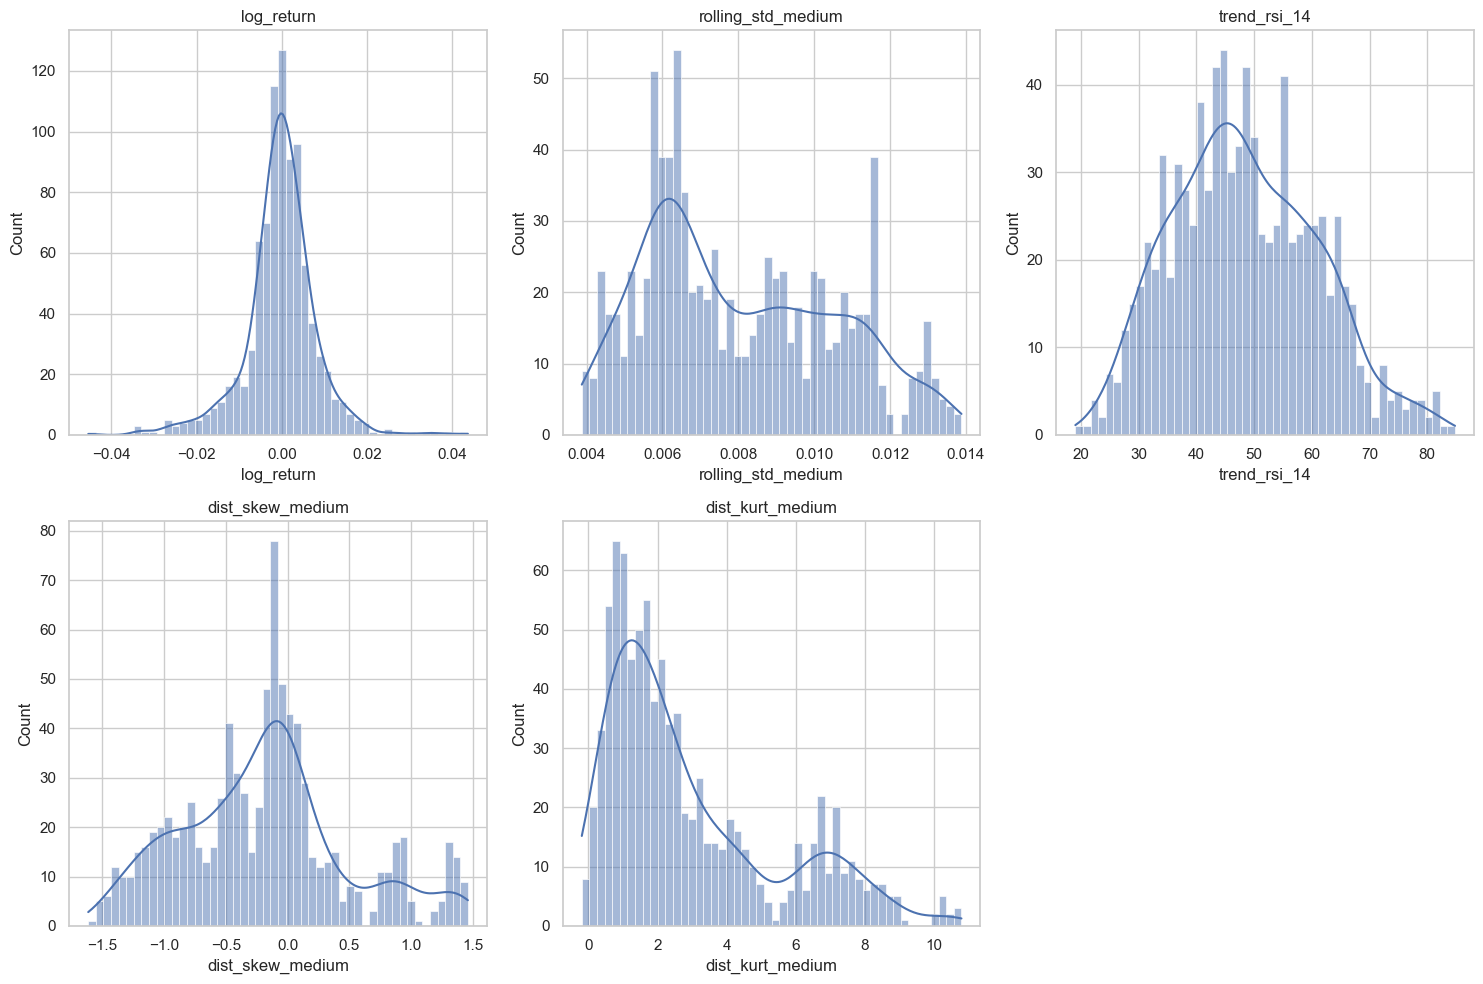

In [15]:
features_to_plot = [
    'log_return', 
    'rolling_std_medium', 
    'trend_rsi_14', 
    'dist_skew_medium', 
    'dist_kurt_medium'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot):
    if col in features.columns:
        plt.subplot(2, 3, i+1)
        sns.histplot(features[col], kde=True, bins=50)
        plt.title(col)
plt.tight_layout()
plt.show()

## 5. Time Series Check
Visualize how features evolve over time, especially during volatile periods.

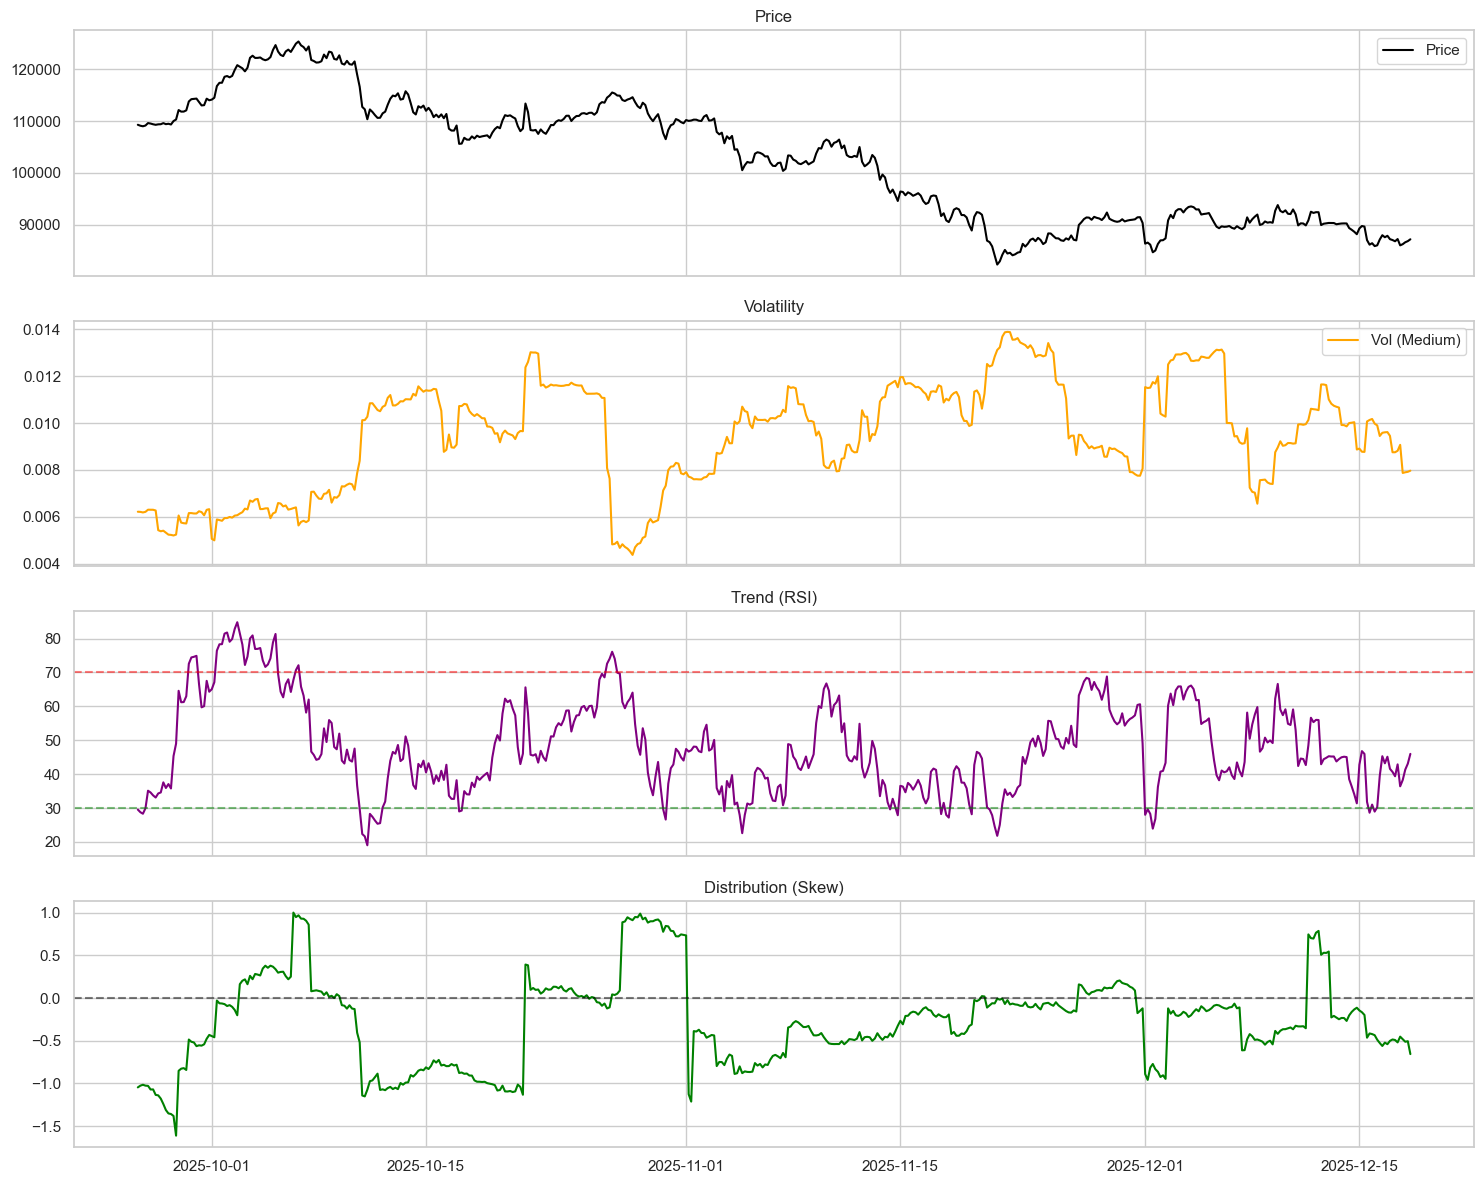

In [16]:
subset = features.iloc[-500:]
price_subset = df.loc[subset.index, 'close']

fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

axes[0].plot(price_subset, color='black', label='Price')
axes[0].set_title("Price")
axes[0].legend()

axes[1].plot(subset['rolling_std_medium'], color='orange', label='Vol (Medium)')
axes[1].set_title("Volatility")
axes[1].legend()

axes[2].plot(subset['trend_rsi_14'], color='purple', label='RSI')
axes[2].axhline(70, linestyle='--', color='red', alpha=0.5)
axes[2].axhline(30, linestyle='--', color='green', alpha=0.5)
axes[2].set_title("Trend (RSI)")

axes[3].plot(subset['dist_skew_medium'], color='green', label='Skew (Medium)')
axes[3].axhline(0, linestyle='--', color='black', alpha=0.5)
axes[3].set_title("Distribution (Skew)")

plt.tight_layout()
plt.show()